<a href="https://colab.research.google.com/github/syedshubha/QNET25_Shubha/blob/main/DenseErrorCKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet qiskit
%pip install --quiet qiskit-aer
%pip install --quiet pylatexenc

In [2]:
# Install the base latex packages
!sudo apt-get update > /dev/null
!sudo apt-get install --quiet texlive-latex-base > /dev/null
!sudo apt-get install --quiet texlive-latex-extra > /dev/null
# Create symbolic link
!sudo ln -s /usr/bin/pdftex /usr/bin/pdflatex
!sudo texhash > /dev/null
!apt-get install -qq poppler-utils > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 24.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
ln: failed to create symbolic link '/usr/bin/pdflatex': File exists


In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Gate, Parameter

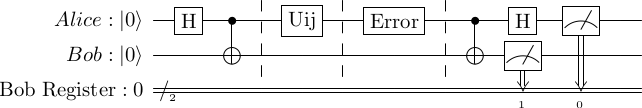

In [4]:
alice = QuantumRegister(1, name='Alice')
bob = QuantumRegister(1, name='Bob')
cr = ClassicalRegister(2, name= "Bob Register")
circuit = QuantumCircuit(alice, bob, cr)

# Create a custom gate
error = Gate(name='Error', num_qubits=1, params=[])
encode = Gate(name='Uij', num_qubits=1, params=[])

circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()

circuit.append(encode,[0])
circuit.barrier()



circuit.append(error, [0])

circuit.barrier()

# Decode the message (Step 3)
circuit.cx(0,1)  # Apply CNOT gate
circuit.h(0)  # Apply Hadamard gate

# Measure the qubits
circuit.measure([0, 1],[0,1])

circuit.draw(output="latex", initial_state=True)

In [5]:
latex_source = circuit.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice} : \ket{{0}} } & \lstick{{Alice} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{1} \barrier[0em]{1} & \qw & \gate{\mathrm{Uij}} \barrier[0em]{1} & \qw & \gate{\mathrm{Error}} \barrier[0em]{1} & \qw & \ctrl{1} & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{{Bob} : \ket{{0}} } & \lstick{{Bob} : \ket{{0}} } & \qw & \targ & \qw & \qw & \qw & \qw & \qw & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{\mathrm{{Bob\;Register} : 0 }} & \lstick{\mathrm{{Bob\;Register} : 0 }} & \lstick{/_{_{2}}} \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-1,0] & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-2,0] & \cw & \cw\\
\\ }}
\end{document}


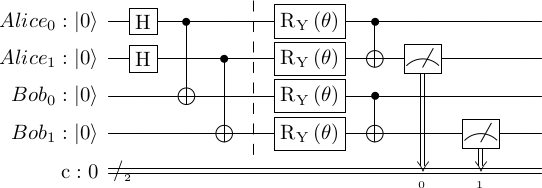

In [6]:
from numpy import pi
theta = Parameter('θ')

def dejmps_purification(theta):
    Alice = QuantumRegister(2, 'Alice')
    Bob = QuantumRegister(2, 'Bob')

    cr = ClassicalRegister(2, 'c')

    qc = QuantumCircuit(Alice, Bob, cr)

    qc.h(Alice[0])
    qc.cx(Alice[0], Bob[0])

    qc.h(Alice[1])
    qc.cx(Alice[1], Bob[1])

    qc.barrier()


    qc.ry(theta, Alice[0])
    qc.ry(theta, Bob[0])
    qc.ry(theta, Alice[1])
    qc.ry(theta, Bob[1])

    qc.cx(Alice[0], Alice[1])
    qc.cx(Bob[0], Bob[1])

    qc.measure(Alice[1], cr[0])
    qc.measure(Bob[1], cr[1])

    return qc



qc = dejmps_purification(theta)
qc.draw(output="latex", initial_state=True)

In [7]:
latex_source = qc.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice}_{0} : \ket{{0}} } & \lstick{{Alice}_{0} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{2} & \qw \barrier[0em]{3} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Alice}_{1} : \ket{{0}} } & \lstick{{Alice}_{1} : \ket{{0}} } & \gate{\mathrm{H}} & \qw & \ctrl{2} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{0} : \ket{{0}} } & \lstick{{Bob}_{0} : \ket{{0}} } & \qw & \targ & \qw & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{1} : \ket{{0}} } & \lstick{{Bob}_{1} : \ket{{0}} } & \qw & \qw & \targ & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \targ & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{c}